# Pandas - Continuación

## Combinando Data Frames

In [1]:
import numpy as np
import pandas as pd

### Append

In [2]:
Nombres = pd.DataFrame({'id':[1,2,3,4], 'Nombre': ["Ana", "Juan", "Carolina", "Pedro"]})
Nombres

,id,Nombre
0,1,Ana
1,2,Juan
2,3,Carolina
3,4,Pedro


In [3]:
Nombres2 = pd.DataFrame({'id':[5,6], 'Nombre': ["Julia", "Alberto"]})
Nombres2

,id,Nombre
0,5,Julia
1,6,Alberto


In [4]:
Nombres.append(Nombres2)

,id,Nombre
0,1,Ana
1,2,Juan
2,3,Carolina
3,4,Pedro
0,5,Julia
1,6,Alberto


### Merge

#### Por una columna

In [5]:
Nombres = pd.DataFrame({'id':[1,2,3,4], 'Nombre': ["Ana", "Juan", "Carolina", "Pedro"]})
Nombres

,id,Nombre
0,1,Ana
1,2,Juan
2,3,Carolina
3,4,Pedro


In [6]:
Edad = pd.DataFrame({'id':[1,2,3,4], 'Edad':[11,21,8,15]})
Edad

,id,Edad
0,1,11
1,2,21
2,3,8
3,4,15


In [7]:
pd.merge(Nombres, Edad)

,id,Nombre,Edad
0,1,Ana,11
1,2,Juan,21
2,3,Carolina,8
3,4,Pedro,15


#### Especificando columna comun

In [8]:
Nombres = pd.DataFrame({'id_Nombres':[1,2,3,4], 'Nombre': ["Ana", "Juan", "Carolina", "Pedro"]})
Edad = pd.DataFrame({'id_edades':[1,2,3,4], 'Edad':[11,21,8,15]})

In [9]:
pd.merge(Nombres, Edad, left_on='id_Nombres', right_on='id_edades')

,id_Nombres,Nombre,id_edades,Edad
0,1,Ana,1,11
1,2,Juan,2,21
2,3,Carolina,3,8
3,4,Pedro,4,15


### How (inner, outer, left, right,...)

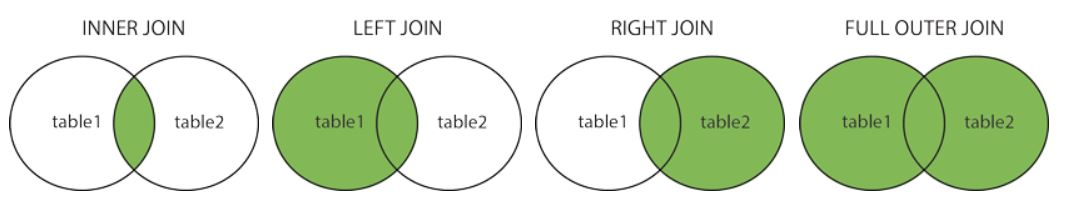

In [10]:
Nombres = pd.DataFrame({'id':[3,4,5,6], 'Nombre': ["Ana", "Juan", "Carolina", "Pedro"]})
Edad = pd.DataFrame({'id':[1,2,3,4], 'Edad':[11,21,8,15]})

In [11]:
Nombres

,id,Nombre
0,3,Ana
1,4,Juan
2,5,Carolina
3,6,Pedro


In [12]:
Edad

,id,Edad
0,1,11
1,2,21
2,3,8
3,4,15


In [13]:
pd.merge(Nombres, Edad, left_on='id', right_on='id', how='inner')

,id,Nombre,Edad
0,3,Ana,8
1,4,Juan,15


In [14]:
pd.merge(Nombres, Edad, how='outer')

,id,Nombre,Edad
0,3,Ana,8.0
1,4,Juan,15.0
2,5,Carolina,NaN
3,6,Pedro,NaN
4,1,NaN,11.0
5,2,NaN,21.0


In [15]:
pd.merge(Nombres, Edad, how='left')

,id,Nombre,Edad
0,3,Ana,8.0
1,4,Juan,15.0
2,5,Carolina,NaN
3,6,Pedro,NaN


In [16]:
pd.merge(Nombres, Edad, how='right')

,id,Nombre,Edad
0,1,NaN,11
1,2,NaN,21
2,3,Ana,8
3,4,Juan,15


## Agrupaciones



In [17]:
path='/Users/adambrosio/Documents/GitHub/DMA_LABO_Austral_2021_rosario/Data/'

In [18]:
data = pd.read_csv(path+"titanic.csv", index_col="PassengerId")

In [19]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Puedo usar un agrupador por Columna

In [20]:
data['Survived'].sum()

342

In [21]:
data['Age'].mean()

29.69911764705882

Y también puedo agrupar por fila, por ejemplo, para construir otra columna

In [22]:
data['NumFam'] = data[['SibSp', 'Parch']].sum(axis=1)
data[['SibSp', 'Parch','NumFam']].head(10)

,SibSp,Parch,NumFam
PassengerId,,,
1,1,0,1
2,1,0,1
3,0,0,0
4,1,0,1
5,0,0,0
6,0,0,0
7,0,0,0
8,3,1,4
9,0,2,2



### Group By

Las agrupaciones sirven para hacer cálculos sobre subconjuntos de los datos, generalmente tienen tres partes:

1. Definir los grupos
2. Aplicar un cálculo
3. Combinar los resultados

In [23]:
agrupado = data.groupby(["Pclass", "Sex"])
agrupado

In [24]:
agrupado.Survived.mean()

Pclass  Sex   
1       female    0.968085
        male      0.368852
2       female    0.921053
        male      0.157407
3       female    0.500000
        male      0.135447
Name: Survived, dtype: float64

In [25]:
agrupado.Survived.agg(
    media="mean",
    maximo= np.max,
    varianza= "var",
    cantidad= "count",
    cant2= len
)

media  maximo  varianza  cantidad  cant2
Pclass Sex                                                
1      female  0.968085       1  0.031229        94     94
       male    0.368852       1  0.234724       122    122
2      female  0.921053       1  0.073684        76     76
       male    0.157407       1  0.133870       108    108
3      female  0.500000       1  0.251748       144    144
       male    0.135447       1  0.117439       347    347

In [26]:
data.groupby("Survived")[['Age', 'SibSp', 'Parch', 'NumFam', 'Fare']].mean()

,Age,SibSp,Parch,NumFam,Fare
Survived,,,,,
0,30.626179,0.553734,0.329690,0.883424,22.117887
1,28.343690,0.473684,0.464912,0.938596,48.395408


### Tablas de contingencia

Las tablas de contingencia asemejan las tablas dinámicas de excel, sirven apra ver inteacciones entre variables



In [27]:
pd.crosstab(data.Age.isnull(), data.Survived)

Survived,0,1
Age,,
False,424,290
True,125,52


In [28]:
pd.crosstab(data.Age.isnull(), data.Survived).apply(lambda x: x/x.sum(), axis=0)

Survived,0,1
Age,,
False,0.772313,0.847953
True,0.227687,0.152047


In [29]:
pd.crosstab(data.Pclass, data.Survived, values=data.Fare, aggfunc=np.mean)

Survived,0,1
Pclass,,
1,64.684008,95.608029
2,19.412328,22.055700
3,13.669364,13.694887


In [30]:
pd.crosstab(pd.qcut(data.Age, 10), data.Sex, values=data.Survived, aggfunc=np.mean)

Sex,female,male
Age,,
"(0.419, 14.0]",0.631579,0.538462
"(14.0, 19.0]",0.783784,0.100000
"(19.0, 22.0]",0.666667,0.108696
"(22.0, 25.0]",0.769231,0.136364
"(25.0, 28.0]",0.722222,0.255814
"(28.0, 31.8]",0.730769,0.175000
"(31.8, 36.0]",0.965517,0.258065
"(36.0, 41.0]",0.681818,0.129032
"(41.0, 50.0]",0.703704,0.235294


In [31]:
pd.crosstab(pd.cut(data.Age, range(0, 100, 10)), data.Sex, values=data.Survived, aggfunc=np.mean)

Sex,female,male
Age,,
"(0, 10]",0.612903,0.575758
"(10, 20]",0.739130,0.144928
"(20, 30]",0.753086,0.154362
"(30, 40]",0.836364,0.230000
"(40, 50]",0.677419,0.218182
"(50, 60]",0.928571,0.142857
"(60, 70]",1.000000,0.071429
"(70, 80]",NaN,0.200000


## Graficación Simple con plot()

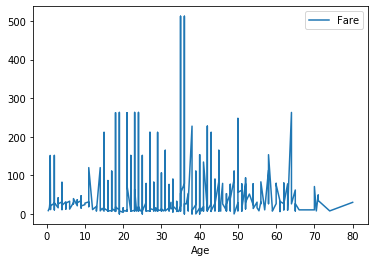

In [32]:
data.sort_values('Age').plot(x = 'Age', y = 'Fare')

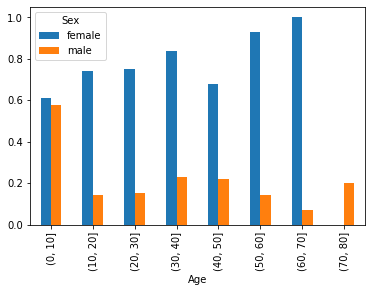

In [33]:
pd.crosstab(pd.cut(data.Age, range(0, 100, 10)), data.Sex, values=data.Survived, aggfunc=np.mean).plot(kind = 'bar')

## Ejercicios

### Combinación de Objetos

Crear los siguientes objetos:

In [34]:
Nombres_1 = pd.DataFrame({'id':[1,2,3,4], 'Nombre': ["Ana", "Juan", "Carolina", "Pedro"]})
Nombres_2 = pd.DataFrame({'id':[5,6,7,8], 'Nombre': ["Martin", "Lucas", "Julieta", "Pablo"]})
Edad_1 = pd.DataFrame({'id_edades':[3,4,5,6], 'Edad':[11,21,8,15]})

Concatenar los objetos Nombres_1 y Nombres_2 en un objeto llamado Nombres_3

In [42]:
Nombre_3=pd.concat((Nombres_1,Nombres_2))
Nombre_3

,id,Nombre
0,1,Ana
1,2,Juan
2,3,Carolina
3,4,Pedro
0,5,Martin
1,6,Lucas
2,7,Julieta
3,8,Pablo


Hacer un Merge de Nombre_3 y Edad_1, quedandonos solo con las filas que coincidan

In [46]:
pd.merge(Nombre_3,Edad_1,left_on='id',right_on='id_edades',how='inner')

,id,Nombre,id_edades,Edad
0,3,Carolina,3,11
1,4,Pedro,4,21
2,5,Martin,5,8
3,6,Lucas,6,15


Hacer un Merge de Nombre_3 y Edad_1, quedandonos solo con todas las filas de Nombre_3

In [47]:
pd.merge(Nombre_3,Edad_1,left_on='id',right_on='id_edades',how='left')

,id,Nombre,id_edades,Edad
0,1,Ana,NaN,NaN
1,2,Juan,NaN,NaN
2,3,Carolina,3.0,11.0
3,4,Pedro,4.0,21.0
4,5,Martin,5.0,8.0
5,6,Lucas,6.0,15.0
6,7,Julieta,NaN,NaN
7,8,Pablo,NaN,NaN


### Agrupaciones

¿Cuál es el precio promedio que se pagó por un Ticket? (Fare)


In [48]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,NumFam
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [56]:
agrupado = data.groupby(["Ticket"])
agrupado.Fare.mean()

Ticket
110152         86.500
110413         79.650
110465         52.000
110564         26.550
110813         75.250
                ...  
W./C. 6608     34.375
W./C. 6609      7.550
W.E.P. 5734    61.175
W/C 14208      10.500
WE/P 5735      71.000
Name: Fare, Length: 681, dtype: float64

In [57]:
data.Fare.mean()

32.2042079685746

¿Cuál es el precio promedio que se pagó en cada Categoría? (Pclass) 

In [58]:
agrupado = data.groupby(["Pclass"])
agrupado.Fare.mean()

Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64

Construir una Tabla de Contingencia usando Genero (Sex) y Categoría (Pclass) para calcular el porcentaje de supervivencia

In [59]:
pd.crosstab(data.Sex, data.Pclass, values=data.Survived, aggfunc=np.mean)

Pclass,1,2,3
Sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


Construir una Tabla de Contingencia usando el Genero y el precio de un Ticket en 5 rangos para calcular el porcentaje de supervivencia

In [61]:
pd.crosstab(pd.qcut(data.Fare, 5), data.Sex, values=data.Survived, aggfunc=np.mean)

Sex,female,male
Fare,,
"(-0.001, 7.854]",0.684211,0.092199
"(7.854, 10.5]",0.527778,0.121622
"(10.5, 21.679]",0.701299,0.200000
"(21.679, 39.688]",0.685714,0.290909
"(39.688, 512.329]",0.924731,0.325301


Graficar el porcentaje de supervivencia por Categoría y Género

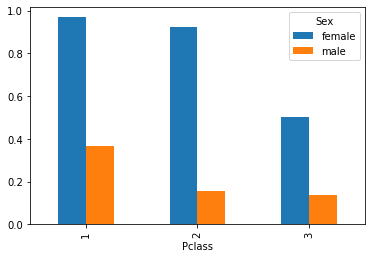

In [64]:
pd.crosstab(data.Pclass, data.Sex, values=data.Survived, aggfunc=np.mean).plot(kind = 'bar')